# Analyse weight matrices  

### Organize imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Set parameters

In [2]:
path = 'weights/'
n_fc = 4
label_g = 'good'
label_b = 'bad'
tolerance = .02     # tolerance to compare mean_good and mean_bad to 0
                    # relative to total range of mean_good and mean_bad

### read weight matrices

In [3]:
w_good = []
w_bad = []

for i in range(n_fc):
    w_good.append(np.loadtxt(path + label_g + '_dim_' + str(i) + '.csv', delimiter=','))
    w_bad.append(np.loadtxt(path + label_b + '_dim_' + str(i) + '.csv', delimiter=','))

w_good = np.asarray(w_good)
w_bad = np.asarray(w_bad)

### compute mean and standard deviation for all 95 input features of the weight matrix in the first dimension w[0]

In [4]:
m_good = np.mean(w_good[0], axis=1)
m_bad = np.mean(w_bad[0], axis=1)

sd_good = np.std(w_good[0], axis=1)
sd_bad = np.std(w_bad[0], axis=1)

### define total range of mean_good and mean_bad

In [5]:
r_bad  = np.max(m_bad)  - np.min(m_bad)
r_good = np.max(m_good) - np.min(m_good)

### select in-significant inputs features

In [6]:
insig_good = np.where(np.isclose(m_good, np.zeros(shape=m_good.shape), rtol=0, atol=tolerance * r_good))[0]
insig_bad = np.where(np.isclose(m_bad, np.zeros(shape=m_bad.shape), rtol=0, atol=tolerance * r_bad))[0]

### create labels for all 95 input features

In [7]:
content_dic = {'Product ID': 1,
           'Reviewer ID': 1, 
           'Product Category': 24, 
           'Overall Rating': 5, 
           'Anatomical Encoder': 12,
           'Logist Regression' : 2,
           'LSTM': 50
          }

In [8]:
content_ar = []
for i in content_dic.keys():
    for j in range(content_dic[i]):
        content_ar.append(i)
content_ar = np.asarray(content_ar)

### Resulting in-significant features

In [9]:
per_good = np.round(len(insig_good) / len(m_good)*100, 0)
per_bad = np.round(len(insig_bad) / len(m_bad) * 100, 0)

print(per_good, '% of the features from the good weight matrix can be considered as in-significant according to the set tolerance threshold')
print(per_bad , '% of the features from the bad  weight matrix can be considered as in-significant according to the set tolerance threshold')

37.0 % of the features from the good weight matrix can be considered as in-significant according to the set tolerance threshold
18.0 % of the features from the bad  weight matrix can be considered as in-significant according to the set tolerance threshold


In [10]:
df_insig = pd.concat(
        [
            pd.DataFrame(content_ar[insig_bad], columns={ 'insignificant feature category from bad weight matrix'}),
            pd.DataFrame(insig_bad, columns={ 'index of insignificant feature category from bad weight matrix'}),
            pd.DataFrame(content_ar[insig_good], columns={'insignificant feature category from good weight matrix'}),
            pd.DataFrame(insig_good, columns={'index of insignificant feature category from good weight matrix'})
        ],
    axis=1, ignore_index=False
)

df_insig.head(max(len(insig_bad),len(insig_good)))

,insignificant feature category from bad weight matrix,index of insignificant feature category from bad weight matrix,insignificant feature category from good weight matrix,index of insignificant feature category from good weight matrix
0,Product Category,16.0,Product ID,0
1,Product Category,18.0,Product Category,8
2,Anatomical Encoder,38.0,Product Category,10
3,LSTM,53.0,Product Category,11
4,LSTM,55.0,Product Category,12
5,LSTM,56.0,Product Category,13
6,LSTM,57.0,Product Category,14
7,LSTM,67.0,Product Category,15
8,LSTM,69.0,Product Category,20
9,LSTM,70.0,Product Category,22


### create normalized importance plot

In [11]:
importance_good = []
importance_bad = []
label = []

for i in content_dic.keys():
    importance_good.append(np.mean(m_good[content_ar == i ]))
    importance_bad.append(np.mean(m_bad[content_ar == i ]))
    label.append(i)

mapping = {l:i for i, l in enumerate(label)}

df_importance = pd.concat(
        [
            pd.DataFrame(importance_good, columns={'normalized importance good'}, index=label),
            pd.DataFrame(importance_bad, columns={'normalized importance bad'}, index=label)
        ],
    axis=1
)

df_importance.head(len(label))

,normalized importance good,normalized importance bad
Product ID,-0.000670,0.014852
Reviewer ID,-0.008723,-0.011227
Product Category,0.001589,0.001260
Overall Rating,-0.001028,0.001058
Anatomical Encoder,-0.002881,-0.000479
Logist Regression,0.001798,0.001110
LSTM,0.015977,0.012174


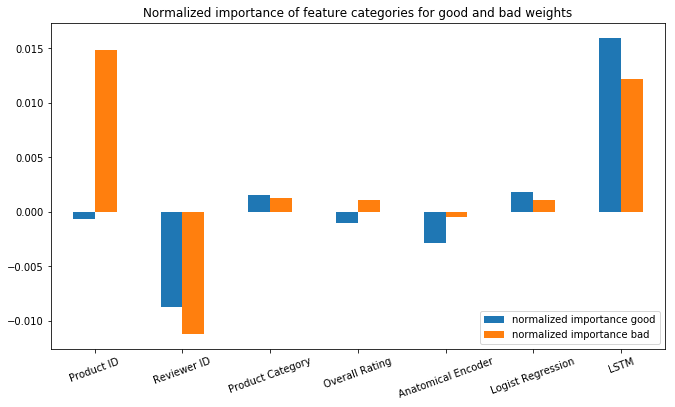

In [12]:
df_importance.plot.bar(figsize=(11,6), title='Normalized importance of feature categories for good and bad weights', rot=20).get_figure().savefig('weights/plot_importance.png', dpi=300)

In [13]:
df_weight = pd.concat(
        [
            pd.DataFrame(m_good, columns={'mean good'}),
            pd.DataFrame(m_bad, columns={'mean bad'}),
            pd.DataFrame(content_ar, columns={'category'})
        ],
    axis=1
)
#df_weight = df_weight.groupby(['category'])
df_weight.head()

,mean good,mean bad,category
0,-0.000670,0.014852,Product ID
1,-0.008723,-0.011227,Reviewer ID
2,-0.007641,-0.011068,Product Category
3,0.013860,-0.012342,Product Category
4,-0.007225,0.011607,Product Category


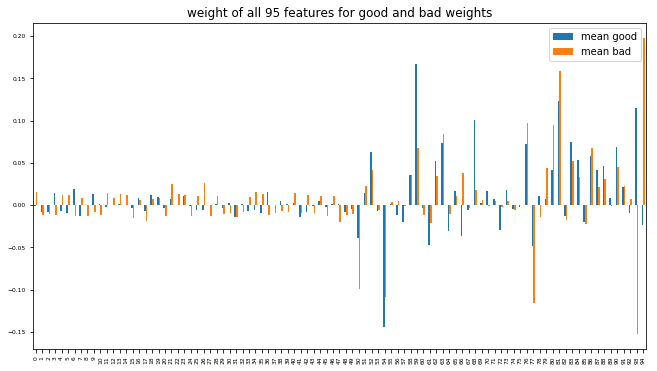

In [14]:
df_weight.plot.bar(figsize=(11,6), title='weight of all 95 features for good and bad weights', rot=90, fontsize=6).get_figure().savefig('weights/plot_weights.png', dpi=300)